<a href="https://colab.research.google.com/github/cdl-hanyang/cdl2022-s-ml/blob/main/week2_1_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np

N = 10

f = lambda x: np.sin(2*np.pi*x)
sigma = 0.1

np.random.seed(42)
x_train = np.random.rand(N)
y_train = f(x_train) + sigma*np.random.randn(N)

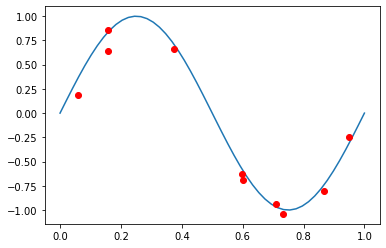

In [29]:
import matplotlib.pyplot as plt

xspan = np.linspace(0, 1)
plt.plot(xspan, f(xspan))
plt.scatter(x_train, y_train, color='r', zorder=3)
plt.show()

**Polynomial basis**
$$
\phi_0(x) = 1, \phi_1(x) = x, \phi_2(x) = x^2
$$

**Gaussian basis**
$$
\phi_0(x) = 1, \phi_1(x) = \exp\left(-\frac{(x - 0.5)^2}{2s^2}\right), \cdots
$$

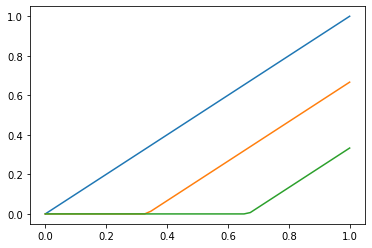

In [47]:
M = 3
basis = 'relu'

if basis == 'gaussian':
    s = 0.5/M
    phi = lambda mu, x: np.exp(-(x - mu)**2/(2*s**2))
    mus = np.linspace(0, 1, M + 2)[1:-1]
    for mui in mus:
        plt.plot(xspan, phi(mui, xspan))
    plt.show()

if basis == 'sine':
    phi = lambda omega, x: np.sin(omega*x)
    omegas = np.arange(1, M+1)
    for omega in omegas:
        plt.plot(xspan, phi(omega, xspan))
    plt.show()

if basis == 'relu':
    phi = lambda mu, x: np.maximum(0, x - mu)
    mus = np.linspace(0, 1, M + 1)[:-1]
    for mui in mus:
        plt.plot(xspan, phi(mui, xspan))
    plt.show()

**Design matrix**
$$
\boldsymbol\Phi = \left(\begin{matrix}\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_M(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_M(x_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_M(x_N)\end{matrix}\right)
$$

$$
(\boldsymbol\Phi)_{ij} = \phi_j(x_i)
$$

**Total loss function value**
$$
\mathcal{L} = \sum_{i = 1}^N L_\text{SE}(\mathbf x_i, y_i; \mathbf w) = \frac 1 2 (\boldsymbol\Phi\mathbf w - \mathbf y)^\mathsf T(\boldsymbol\Phi\mathbf w - \mathbf y)
$$

In [48]:
if basis == 'gaussian' or basis == 'relu':
    PHI = np.stack([np.ones(N)] + [phi(mui, x_train) for mui in mus], axis=1)
if basis == 'sine':
    PHI = np.stack([np.ones(N)] + [phi(omega, x_train) for omega in omegas], axis=1)
wopt = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y_train))
print(wopt)

[ 0.21353782  2.54071772 -9.1252359   9.20938828]


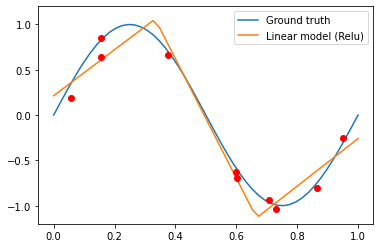

In [49]:
if basis == 'gaussian' or basis == 'relu':
    fhat = lambda x: np.stack([np.ones(len(x))] + [phi(mui, x) for mui in mus], axis=1).dot(wopt)
if basis == 'sine':
    fhat = lambda x: np.stack([np.ones(len(x))] + [phi(omega, x) for omega in omegas], axis=1).dot(wopt)

plt.plot(xspan, f(xspan), label='Ground truth')
plt.plot(xspan, fhat(xspan), label='Linear model (Relu)')
plt.legend()
plt.scatter(x_train, y_train, color='r', zorder=3)
plt.ylim(-1.2, 1.2)
plt.show()